In [44]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

%config InlineBackend.figure_format = 'svg'

In [45]:
df = pd.read_csv('data/Seasons_Stats.csv', index_col=0)
df.head()

Year           Player  Pos   Age   Tm     G  GS  MP  PER    TS%  ...  \
0  1950.0  Curly Armstrong  G-F  31.0  FTW  63.0 NaN NaN  NaN  0.368  ...   
1  1950.0     Cliff Barker   SG  29.0  INO  49.0 NaN NaN  NaN  0.435  ...   
2  1950.0    Leo Barnhorst   SF  25.0  CHS  67.0 NaN NaN  NaN  0.394  ...   
3  1950.0       Ed Bartels    F  24.0  TOT  15.0 NaN NaN  NaN  0.312  ...   
4  1950.0       Ed Bartels    F  24.0  DNN  13.0 NaN NaN  NaN  0.308  ...   

     FT%  ORB  DRB  TRB    AST  STL  BLK  TOV     PF    PTS  
0  0.705  NaN  NaN  NaN  176.0  NaN  NaN  NaN  217.0  458.0  
1  0.708  NaN  NaN  NaN  109.0  NaN  NaN  NaN   99.0  279.0  
2  0.698  NaN  NaN  NaN  140.0  NaN  NaN  NaN  192.0  438.0  
3  0.559  NaN  NaN  NaN   20.0  NaN  NaN  NaN   29.0   63.0  
4  0.548  NaN  NaN  NaN   20.0  NaN  NaN  NaN   27.0   59.0  

[5 rows x 52 columns]

In [46]:
df.columns

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [47]:
df.shape

(24691, 52)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24691 entries, 0 to 24690
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    24624 non-null  float64
 1   Player  24624 non-null  object 
 2   Pos     24624 non-null  object 
 3   Age     24616 non-null  float64
 4   Tm      24624 non-null  object 
 5   G       24624 non-null  float64
 6   GS      18233 non-null  float64
 7   MP      24138 non-null  float64
 8   PER     24101 non-null  float64
 9   TS%     24538 non-null  float64
 10  3PAr    18839 non-null  float64
 11  FTr     24525 non-null  float64
 12  ORB%    20792 non-null  float64
 13  DRB%    20792 non-null  float64
 14  TRB%    21571 non-null  float64
 15  AST%    22555 non-null  float64
 16  STL%    20792 non-null  float64
 17  BLK%    20792 non-null  float64
 18  TOV%    19582 non-null  float64
 19  USG%    19640 non-null  float64
 20  blanl   0 non-null      float64
 21  OWS     24585 non-null  float64
 22  DWS

In [49]:
df['Year'] = df['Year'].dropna().astype('int64')
'''
1976 is the year of NBA and ABA merger. Generally stats became much better.
'''
df = df[df['Year'] > 1976]

In [50]:
df['Year']

4649     1977.0
4650     1977.0
4651     1977.0
4652     1977.0
4653     1977.0
          ...  
24686    2017.0
24687    2017.0
24688    2017.0
24689    2017.0
24690    2017.0
Name: Year, Length: 20002, dtype: float64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20002 entries, 4649 to 24690
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    20002 non-null  float64
 1   Player  20002 non-null  object 
 2   Pos     20002 non-null  object 
 3   Age     20002 non-null  float64
 4   Tm      20002 non-null  object 
 5   G       20002 non-null  float64
 6   GS      18233 non-null  float64
 7   MP      20002 non-null  float64
 8   PER     19997 non-null  float64
 9   TS%     19922 non-null  float64
 10  3PAr    18839 non-null  float64
 11  FTr     19910 non-null  float64
 12  ORB%    19997 non-null  float64
 13  DRB%    19997 non-null  float64
 14  TRB%    19997 non-null  float64
 15  AST%    19997 non-null  float64
 16  STL%    19997 non-null  float64
 17  BLK%    19997 non-null  float64
 18  TOV%    19582 non-null  float64
 19  USG%    19640 non-null  float64
 20  blanl   0 non-null      float64
 21  OWS     20002 non-null  float64
 22  

In [ ]:
df = df.drop(['blanl', 'blank2'], axis=1)


In [95]:
df.info()
df = df[df['G'] > 20]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20002 entries, 0 to 20001
Data columns (total 56 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    20002 non-null  float64
 1   Player  20002 non-null  object 
 2   Pos     20002 non-null  object 
 3   Age     20002 non-null  float64
 4   Tm      20002 non-null  object 
 5   G       20002 non-null  float64
 6   GS      18233 non-null  float64
 7   MP      20002 non-null  float64
 8   PER     19997 non-null  float64
 9   TS%     19922 non-null  float64
 10  3PAr    18839 non-null  float64
 11  FTr     19910 non-null  float64
 12  ORB%    19997 non-null  float64
 13  DRB%    19997 non-null  float64
 14  TRB%    19997 non-null  float64
 15  AST%    19997 non-null  float64
 16  STL%    19997 non-null  float64
 17  BLK%    19997 non-null  float64
 18  TOV%    19582 non-null  float64
 19  USG%    19640 non-null  float64
 20  OWS     20002 non-null  float64
 21  DWS     20002 non-null  float64
 22

In [54]:
" per game metrics for points, rebounds, assists, steals, blocks"
df['PPG'] = (df['PTS'] / df['G']).round(1)
df['RPG'] = (df['TRB'] / df['G']).round(1)
df['APG'] = (df['AST'] / df['G']).round(1)
df['SPG'] = (df['STL'] / df['G']).round(1)
df['BPG'] = (df['BLK'] / df['G']).round(1)
df.head()

Year                Player Pos   Age   Tm     G  GS      MP   PER  \
4649  1977.0       Zaid Abdul-Aziz   C  30.0  BUF  22.0 NaN   195.0  16.3   
4650  1977.0  Kareem Abdul-Jabbar*   C  29.0  LAL  82.0 NaN  3016.0  27.8   
4651  1977.0         Tom Abernethy  SF  22.0  LAL  70.0 NaN  1378.0  12.7   
4652  1977.0           Alvan Adams   C  22.0  PHO  72.0 NaN  2278.0  20.2   
4653  1977.0             Don Adams  SF  29.0  BUF  77.0 NaN  1710.0  11.7   

        TS%  ...    STL    BLK  TOV     PF     PTS   PPG   RPG  APG  SPG  BPG  
4649  0.447  ...    3.0    9.0  NaN   21.0    83.0   3.8   4.1  0.3  0.1  0.4  
4650  0.608  ...  101.0  261.0  NaN  262.0  2152.0  26.2  13.3  3.9  1.2  3.2  
4651  0.538  ...   49.0   10.0  NaN  118.0   439.0   6.3   4.2  1.4  0.7  0.1  
4652  0.519  ...   95.0   87.0  NaN  260.0  1296.0  18.0   9.1  4.5  1.3  1.2  
4653  0.466  ...   74.0   16.0  NaN  201.0   561.0   7.3   4.8  1.9  1.0  0.2  

[5 rows x 55 columns]

In [55]:
df[df['PPG'] > 20]

Year                Player Pos   Age   Tm     G    GS      MP   PER  \
4650   1977.0  Kareem Abdul-Jabbar*   C  29.0  LAL  82.0   NaN  3016.0  27.8   
4656   1977.0       Tiny Archibald*  PG  28.0  NYN  34.0   NaN  1277.0  19.4   
4668   1977.0           Rick Barry*  SF  32.0  GSW  79.0   NaN  2904.0  19.3   
4678   1977.0             Ron Boone  SG  30.0  KCK  82.0   NaN  3021.0  17.5   
4710   1977.0          Phil Chenier  SG  26.0  WSB  78.0   NaN  2842.0  15.8   
...       ...                   ...  ..   ...  ...   ...   ...     ...   ...   
24625  2017.0    Karl-Anthony Towns   C  21.0  MIN  82.0  82.0  3030.0  26.0   
24645  2017.0          Kemba Walker  PG  26.0  CHO  79.0  79.0  2739.0  21.3   
24646  2017.0             John Wall  PG  26.0  WAS  78.0  78.0  2836.0  23.2   
24654  2017.0     Russell Westbrook  PG  28.0  OKC  81.0  81.0  2802.0  30.6   
24658  2017.0        Andrew Wiggins  SF  21.0  MIN  82.0  82.0  3048.0  16.5   

         TS%  ...    STL    BLK    TOV     PF     PTS   PPG   RPG   APG  SPG  \
4650   0.608  ...  101.0  261.0    NaN  262.0  2152.0  26.2  13.3   3.9  1.2   
4656   0.520  ...   59.0   11.0    NaN   77.0   697.0  20.5   2.4   7.5  1.7   
4668   0.500  ...  172.0   58.0    NaN  194.0  1723.0  21.8   5.3   6.0  2.2   
4678   0.521  ...  119.0   19.0    NaN  258.0  1818.0  22.2   3.9   4.1  1.5   
4710   0.489  ...  120.0   39.0    NaN  166.0  1578.0  20.2   3.8   3.8  1.5   
...      ...  ...    ...    ...    ...    ...     ...   ...   ...   ...  ...   
24625  0.618  ...   57.0  103.0  212.0  241.0  2061.0  25.1  12.3   2.7  0.7   
24645  0.569  ...   85.0   22.0  168.0  119.0  1830.0  23.2   3.9   5.5  1.1   
24646  0.541  ...  157.0   49.0  323.0  151.0  1805.0  23.1   4.2  10.7  2.0   
24654  0.554  ...  133.0   31.0  438.0  190.0  2558.0  31.6  10.7  10.4  1.6   
24658  0.534  ...   82.0   30.0  187.0  183.0  1933.0  23.6   4.0   2.3  1.0   

       BPG  
4650   3.2  
4656   0.3  
4668   0.7  
4678   0.2  
4710   0.5  
...    ...  
24625  1.3  
24645  0.3  
24646  0.6  
24654  0.4  
24658  0.4  

[1003 rows x 55 columns]

In [56]:
df.reset_index(drop=True, inplace=True)

In [57]:
df.head()

Year                Player Pos   Age   Tm     G  GS      MP   PER    TS%  \
0  1977.0       Zaid Abdul-Aziz   C  30.0  BUF  22.0 NaN   195.0  16.3  0.447   
1  1977.0  Kareem Abdul-Jabbar*   C  29.0  LAL  82.0 NaN  3016.0  27.8  0.608   
2  1977.0         Tom Abernethy  SF  22.0  LAL  70.0 NaN  1378.0  12.7  0.538   
3  1977.0           Alvan Adams   C  22.0  PHO  72.0 NaN  2278.0  20.2  0.519   
4  1977.0             Don Adams  SF  29.0  BUF  77.0 NaN  1710.0  11.7  0.466   

   ...    STL    BLK  TOV     PF     PTS   PPG   RPG  APG  SPG  BPG  
0  ...    3.0    9.0  NaN   21.0    83.0   3.8   4.1  0.3  0.1  0.4  
1  ...  101.0  261.0  NaN  262.0  2152.0  26.2  13.3  3.9  1.2  3.2  
2  ...   49.0   10.0  NaN  118.0   439.0   6.3   4.2  1.4  0.7  0.1  
3  ...   95.0   87.0  NaN  260.0  1296.0  18.0   9.1  4.5  1.3  1.2  
4  ...   74.0   16.0  NaN  201.0   561.0   7.3   4.8  1.9  1.0  0.2  

[5 rows x 55 columns]

In [58]:
df.head()

Year                Player Pos   Age   Tm     G  GS      MP   PER    TS%  \
0  1977.0       Zaid Abdul-Aziz   C  30.0  BUF  22.0 NaN   195.0  16.3  0.447   
1  1977.0  Kareem Abdul-Jabbar*   C  29.0  LAL  82.0 NaN  3016.0  27.8  0.608   
2  1977.0         Tom Abernethy  SF  22.0  LAL  70.0 NaN  1378.0  12.7  0.538   
3  1977.0           Alvan Adams   C  22.0  PHO  72.0 NaN  2278.0  20.2  0.519   
4  1977.0             Don Adams  SF  29.0  BUF  77.0 NaN  1710.0  11.7  0.466   

   ...    STL    BLK  TOV     PF     PTS   PPG   RPG  APG  SPG  BPG  
0  ...    3.0    9.0  NaN   21.0    83.0   3.8   4.1  0.3  0.1  0.4  
1  ...  101.0  261.0  NaN  262.0  2152.0  26.2  13.3  3.9  1.2  3.2  
2  ...   49.0   10.0  NaN  118.0   439.0   6.3   4.2  1.4  0.7  0.1  
3  ...   95.0   87.0  NaN  260.0  1296.0  18.0   9.1  4.5  1.3  1.2  
4  ...   74.0   16.0  NaN  201.0   561.0   7.3   4.8  1.9  1.0  0.2  

[5 rows x 55 columns]

<Axes: xlabel='Year'>

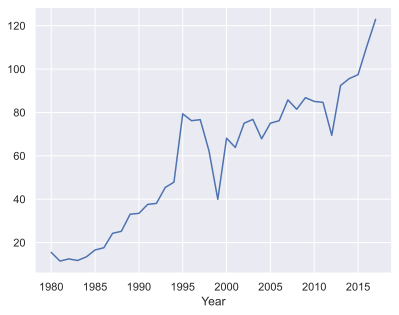

In [59]:
df.groupby('Year')['3PA'].agg('mean').plot()

<Axes: xlabel='PPG', ylabel='Count'>

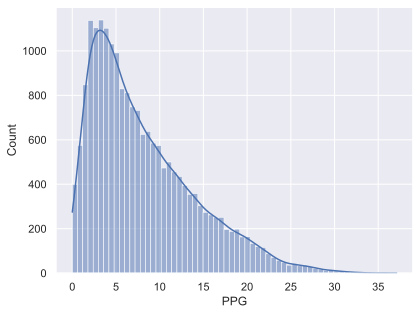

In [60]:
sns.histplot(x='PPG', data=df, kde=True)

In [61]:
df.columns

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'PPG', 'RPG', 'APG', 'SPG', 'BPG'],
      dtype='object')

array([[<Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
        <Axes: xlabel='Year'>]], dtype=object)

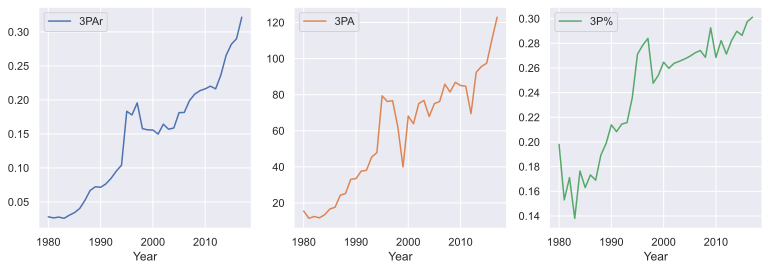

In [62]:
three_point_cols = ['3PAr', '3PA', '3P%']
two_point_cols = ['2PA', '2P%']

df[three_point_cols + ['Year']].groupby('Year').mean().plot(layout=(1,3), subplots=True, sharex=False, figsize=(13,4))

array([[<Axes: xlabel='Year'>, <Axes: xlabel='Year'>]], dtype=object)

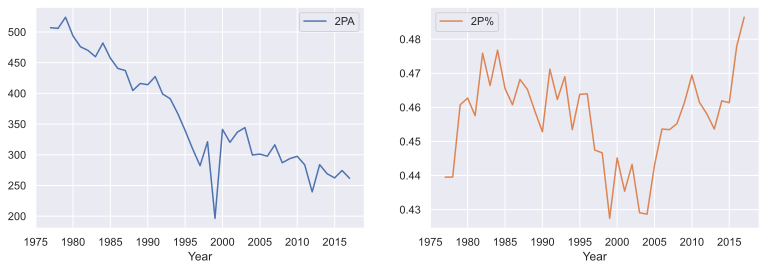

In [63]:
df[two_point_cols + ['Year']].groupby('Year').mean().plot(layout=(1,2), subplots=True, sharex=False, figsize=(13,4))

array([[<Axes: xlabel='Year'>, <Axes: xlabel='Year'>]], dtype=object)

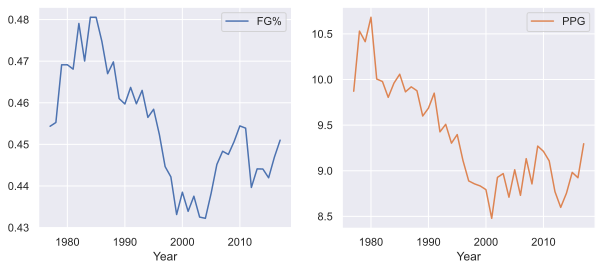

In [98]:
(
    df[['FG%', 'PPG', 'Year']]
        .groupby('Year')
        .mean()
        .plot(
            layout=(1,2),
            subplots=True, 
            sharex=False,
            figsize=(10,4)
        )
)

array([[<Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
        <Axes: xlabel='Year'>]], dtype=object)

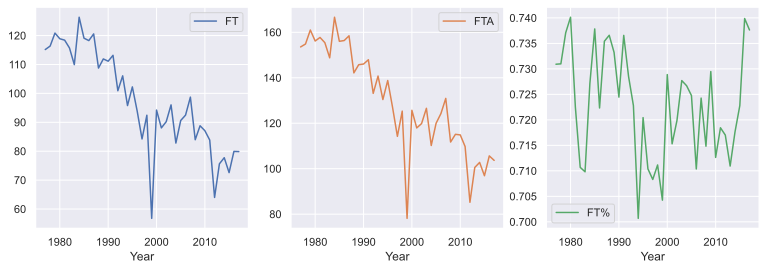

In [64]:
freethrow_cols = ['FT', 'FTA', 'FT%']

(
    df[freethrow_cols + ['Year']]
    .groupby('Year')
    .mean()
    .plot(layout=(1,3), subplots=True, sharex=False, figsize=(13,4))
)

<Axes: xlabel='TS%', ylabel='Count'>

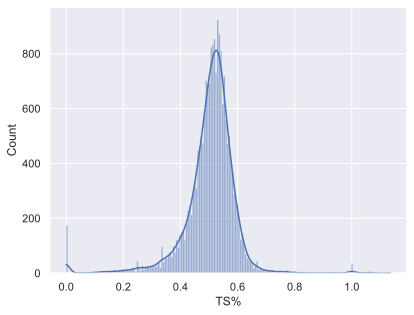

In [65]:
sns.histplot(x='TS%', data=df, kde=True)

In [ ]:
TS_mean_year = df.groupby('Year')['TS%'].mean()
TS_mean_year

In [66]:
'''
rTS% expresses how much more efficient a given player is compared to league average
if rTS% is positive then player is better
'''
df = pd.merge(df, TS_mean_year, on='Year', how='inner').rename(columns={'TS%_x' : 'TS%', 'TS%_y': 'League Average TS%'})


In [74]:
df['rTS%'] = (df['TS%'] / df['League Average TS%'] - 1)
df = df.round(2)

In [76]:
df = df.drop(['League Average TS%'], axis=1)

In [77]:
df.head()

Year                Player Pos   Age   Tm     G  GS      MP   PER   TS%  \
0  1977.0       Zaid Abdul-Aziz   C  30.0  BUF  22.0 NaN   195.0  16.3  0.45   
1  1977.0  Kareem Abdul-Jabbar*   C  29.0  LAL  82.0 NaN  3016.0  27.8  0.61   
2  1977.0         Tom Abernethy  SF  22.0  LAL  70.0 NaN  1378.0  12.7  0.54   
3  1977.0           Alvan Adams   C  22.0  PHO  72.0 NaN  2278.0  20.2  0.52   
4  1977.0             Don Adams  SF  29.0  BUF  77.0 NaN  1710.0  11.7  0.47   

   ...    BLK  TOV     PF     PTS   PPG   RPG  APG  SPG  BPG  rTS%  
0  ...    9.0  NaN   21.0    83.0   3.8   4.1  0.3  0.1  0.4 -0.08  
1  ...  261.0  NaN  262.0  2152.0  26.2  13.3  3.9  1.2  3.2  0.25  
2  ...   10.0  NaN  118.0   439.0   6.3   4.2  1.4  0.7  0.1  0.11  
3  ...   87.0  NaN  260.0  1296.0  18.0   9.1  4.5  1.3  1.2  0.07  
4  ...   16.0  NaN  201.0   561.0   7.3   4.8  1.9  1.0  0.2 -0.04  

[5 rows x 56 columns]

<Axes: xlabel='rTS%', ylabel='Density'>

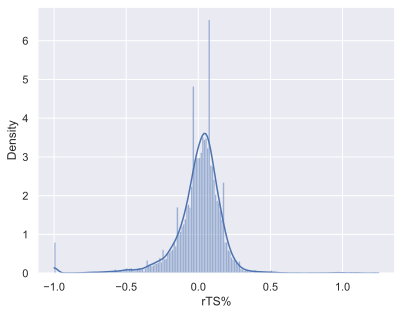

In [84]:
sns.histplot(x='rTS%', data=df, kde=True, stat='density')

In [87]:
df[df['Player'] == 'Steve Nash']

Year      Player Pos   Age   Tm     G    GS      MP   PER   TS%  ...  \
8536   1997.0  Steve Nash  PG  22.0  PHO  65.0   2.0   684.0  10.8  0.54  ...   
9067   1998.0  Steve Nash  PG  23.0  PHO  76.0   9.0  1664.0  15.6  0.56  ...   
9613   1999.0  Steve Nash  PG  24.0  DAL  40.0  40.0  1269.0  10.9  0.47  ...   
10127  2000.0  Steve Nash  PG  25.0  DAL  56.0  27.0  1532.0  13.5  0.60  ...   
10647  2001.0  Steve Nash  PG  26.0  DAL  70.0  70.0  2387.0  19.6  0.60  ...   
11159  2002.0  Steve Nash  PG  27.0  DAL  82.0  82.0  2837.0  20.7  0.60  ...   
11643  2003.0  Steve Nash  PG  28.0  DAL  82.0  82.0  2711.0  22.6  0.58  ...   
12190  2004.0  Steve Nash  PG  29.0  DAL  78.0  78.0  2612.0  20.5  0.59  ...   
12775  2005.0  Steve Nash  PG  30.0  PHO  75.0  75.0  2573.0  22.0  0.61  ...   
13342  2006.0  Steve Nash  PG  31.0  PHO  79.0  79.0  2796.0  23.3  0.63  ...   
13883  2007.0  Steve Nash  PG  32.0  PHO  76.0  76.0  2682.0  23.8  0.65  ...   
14448  2008.0  Steve Nash  PG  33.0  PHO  81.0  81.0  2780.0  21.1  0.64  ...   
15041  2009.0  Steve Nash  PG  34.0  PHO  74.0  74.0  2484.0  19.5  0.62  ...   
15641  2010.0  Steve Nash  PG  35.0  PHO  81.0  81.0  2660.0  21.6  0.62  ...   
16238  2011.0  Steve Nash  PG  36.0  PHO  75.0  75.0  2497.0  20.8  0.60  ...   
16815  2012.0  Steve Nash  PG  37.0  PHO  62.0  62.0  1961.0  20.3  0.62  ...   
17376  2013.0  Steve Nash  PG  38.0  LAL  50.0  50.0  1627.0  16.0  0.60  ...   
17982  2014.0  Steve Nash  PG  39.0  LAL  15.0  10.0   313.0  12.2  0.49  ...   

        BLK    TOV     PF     PTS   PPG  RPG   APG  SPG  BPG  rTS%  
8536    0.0   63.0   92.0   213.0   3.3  1.0   2.1  0.3  0.0  0.07  
9067    4.0   98.0  145.0   691.0   9.1  2.1   3.4  0.8  0.1  0.12  
9613    2.0   83.0   98.0   315.0   7.9  2.8   5.5  0.9  0.0 -0.02  
10127   3.0  102.0  122.0   481.0   8.6  2.2   4.9  0.7  0.1  0.22  
10647   5.0  205.0  158.0  1092.0  15.6  3.2   7.3  1.0  0.1  0.24  
11159   4.0  229.0  164.0  1466.0  17.9  3.1   7.7  0.6  0.0  0.22  
11643   6.0  192.0  134.0  1455.0  17.7  2.9   7.3  1.0  0.1  0.20  
12190   8.0  209.0  139.0  1128.0  14.5  3.0   8.8  0.9  0.1  0.22  
12775   6.0  245.0  136.0  1165.0  15.5  3.3  11.5  1.0  0.1  0.22  
13342  12.0  276.0  120.0  1489.0  18.8  4.2  10.5  0.8  0.2  0.25  
13883   6.0  287.0  117.0  1412.0  18.6  3.5  11.6  0.8  0.1  0.29  
14448   5.0  295.0  113.0  1371.0  16.9  3.5  11.1  0.7  0.1  0.27  
15041  10.0  248.0  108.0  1160.0  15.7  3.0   9.7  0.7  0.1  0.19  
15641  12.0  295.0  108.0  1333.0  16.5  3.3  11.0  0.5  0.1  0.20  
16238   4.0  265.0   87.0  1106.0  14.7  3.5  11.4  0.6  0.1  0.18  
16815   8.0  229.0   53.0   772.0  12.5  3.0  10.7  0.6  0.1  0.25  
17376   5.0  126.0   70.0   636.0  12.7  2.8   6.7  0.6  0.1  0.21  
17982   2.0   31.0   18.0   102.0   6.8  1.9   5.7  0.5  0.1 -0.04  

[18 rows x 56 columns]

In [91]:
df.select_dtypes(include=np.number).loc[:, 'TS%':].describe()

TS%          3PAr           FTr          ORB%          DRB%  \
count  19922.000000  18839.000000  19910.000000  19997.000000  19997.000000   
mean       0.503217      0.158436      0.319614      6.176837     13.706001   
std        0.093851      0.187647      0.228840      4.909270      6.621271   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.470000      0.000000      0.200000      2.600000      8.800000   
50%        0.520000      0.060000      0.290000      5.400000     12.700000   
75%        0.550000      0.290000      0.390000      9.000000     18.100000   
max        1.140000      1.000000      6.000000    100.000000    100.000000   

               TRB%          AST%          STL%          BLK%          TOV%  \
count  19997.000000  19997.000000  19997.000000  19997.000000  19582.000000   
mean       9.942426     13.094629      1.650903      1.429909     15.085099   
std        5.057414      9.453311      1.024107      1.794839      6.919170   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.000000      6.400000      1.100000      0.400000     11.400000   
50%        9.200000     10.400000      1.500000      0.900000     14.200000   
75%       13.400000     17.800000      2.100000      1.900000     17.700000   
max      100.000000    100.000000     24.200000     77.800000    100.000000   

       ...           BLK           TOV            PF           PTS  \
count  ...  20002.000000  19645.000000  20002.000000  20002.000000   
mean   ...     24.417408     73.939832    110.008499    492.163384   
std    ...     36.737013     67.713803     81.905123    481.792911   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      3.000000     18.000000     36.000000     98.000000   
50%    ...     11.000000     55.000000    101.000000    345.000000   
75%    ...     29.000000    112.000000    172.000000    759.000000   
max    ...    456.000000    464.000000    386.000000   3041.000000   

                PPG           RPG           APG           SPG           BPG  \
count  20002.000000  20002.000000  20002.000000  20002.000000  20002.000000   
mean       8.116523      3.498045      1.862114      0.666763      0.407299   
std        5.978462      2.567803      1.840347      0.485581      0.513332   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.400000      1.600000      0.600000      0.300000      0.100000   
50%        6.600000      2.800000      1.300000      0.600000      0.200000   
75%       11.600000      4.700000      2.500000      0.900000      0.500000   
max       37.100000     18.700000     14.500000      3.700000      6.000000   

               rTS%  
count  19922.000000  
mean      -0.000020  
std        0.185563  
min       -1.000000  
25%       -0.060000  
50%        0.020000  
75%        0.090000  
max        1.250000  

[8 rows x 47 columns]

In [96]:
sns.scatterplot(data=df, x='FG%', y='PPG', alpha=0.6)

<Axes: xlabel='FG%', ylabel='PPG'>

In [97]:
sns.scatterplot(data=df, x='TS%', y='PPG', alpha=0.6)

<Axes: xlabel='TS%', ylabel='PPG'>

In [100]:
#Do high volume scorers sacrifice efficiency ?
sns.jointplot(x='USG%', y='FG%', data=df)

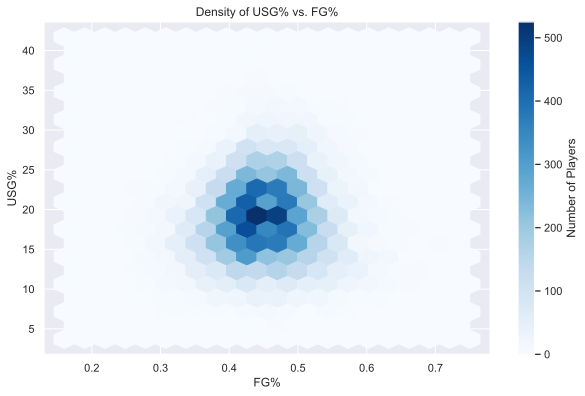

In [106]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['FG%'], df['USG%'], gridsize=20, cmap='Blues')
plt.colorbar(label='Number of Players')
plt.title("Density of USG% vs. FG%")
plt.xlabel("FG%")
plt.ylabel("USG%")
plt.show()

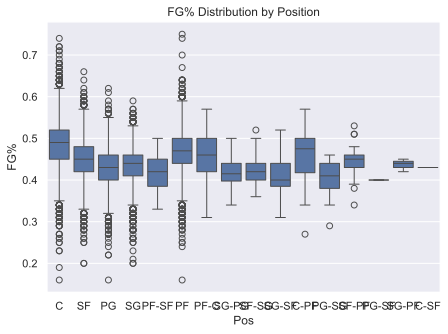

In [104]:
sns.boxplot(data=df, x='Pos', y='FG%')
plt.title("FG% Distribution by Position")
plt.tight_layout()
plt.show()